<a href="https://colab.research.google.com/github/IT-17005/Transfer-Learning/blob/master/Schizo_EfficientNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Import The Libraries 
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import tensorflow as tf
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [13]:
from google.colab import drive
drive .mount('/content/drive/') 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [14]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
train_path="/content/drive/MyDrive/dataset/data/train"
valid_path="/content/drive/MyDrive/dataset/data/validation"

In [11]:
effi = tf.keras.applications.EfficientNetV2L(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=IMAGE_SIZE + [3],
    pooling='avg',
    classes=2,
    classifier_activation="softmax",
)

In [15]:
effi.summary()

Model: "efficientnetv2-l"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_3[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 32  864         ['rescaling_2[0][0]']            
                                )                                                                 
                                                                                   

In [21]:
# This will let us use the default weights used by the imagenet.  
for layer in effi.layers:
    layer.trainable = False

In [24]:
# Set the flatten layer.
x = Flatten() (effi.output)

In [25]:
prediction = Dense(2, activation = 'softmax')(x)

In [26]:
# Create a model Object
model = Model(inputs = effi.input, outputs = prediction)

In [27]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_3[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 32  864         ['rescaling_2[0][0]']            
                                )                                                                 
                                                                                              

In [28]:
# Use the Image Data Generator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [29]:
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size = IMAGE_SIZE,
    batch_size = 16,
    class_mode = 'binary' # As we have more than 2 so using categorical.. for 2 we might have used binary.
)

Found 282 images belonging to 2 classes.


In [30]:
test_set = train_datagen.flow_from_directory(
    valid_path,
    target_size = IMAGE_SIZE,
    batch_size = 16,
    class_mode = 'binary'
)

Found 95 images belonging to 2 classes.


In [31]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [32]:
# Fit the model.
hist = model.fit(training_set, validation_data = test_set, steps_per_epoch = 10, epochs = 5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


10/10 [==============================] - 183s 16s/step - loss: 0.6989 - accuracy: 0.4935 - val_loss: 0.6482 - val_accuracy: 0.6737
Epoch 2/5
10/10 [==============================] - 137s 14s/step - loss: 0.6809 - accuracy: 0.5130 - val_loss: 0.6813 - val_accuracy: 0.6000
Epoch 3/5
10/10 [==============================] - 137s 14s/step - loss: 0.6745 - accuracy: 0.5562 - val_loss: 0.7412 - val_accuracy: 0.3263
Epoch 4/5
10/10 [==============================] - 137s 14s/step - loss: 0.6578 - accuracy: 0.6000 - val_loss: 0.6952 - val_accuracy: 0.5474
Epoch 5/5
10/10 [==============================] - 132s 14s/step - loss: 0.6395 - accuracy: 0.9286 - val_loss: 0.6775 - val_accuracy: 0.5263


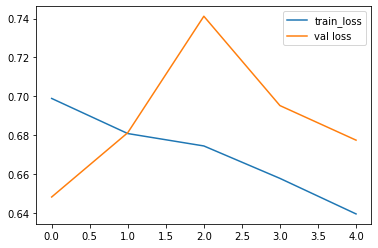

In [33]:
plt.plot(hist.history['loss'], label = 'train_loss')
plt.plot(hist.history['val_loss'], label ='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

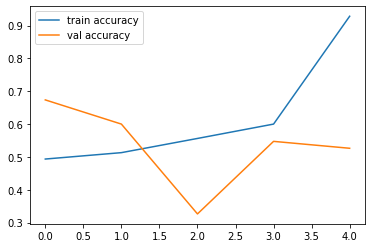

In [34]:
# Plot the Accuracy
plt.plot(hist.history['accuracy'], label = 'train accuracy')
plt.plot(hist.history['val_accuracy'], label ='val accuracy')
plt.legend()
plt.show()
# plt.savefig('valAccuracy')